In [1]:
import cv2
import torch
import torchvision.transforms as T
import gym

import matplotlib.pyplot as plt

from entities.agent import Agent
from entities.networks import PlatformerNet

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


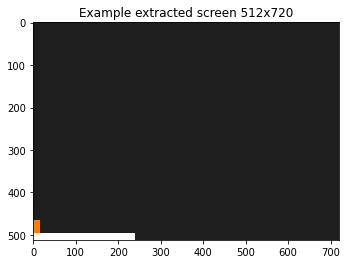

In [2]:
continuous_env = gym.make("gym_platformer:platformer-v0")

device = torch.device("cpu")

continuous_env.reset()
continuous_env.step(5)

resize = T.Compose(
    [
        T.ToPILImage(),
        # T.Resize((32,45)),
        T.ToTensor(),
    ]
)

# Get number of actions from gym action space
n_actions = continuous_env.action_space.n
# Initializes agent
agent = Agent(n_actions)

# init_screen = get_screen(discrete_env)
init_screen = agent.observe_env(continuous_env, resize, device)
_, _, height, width = init_screen.shape
plt.figure()
plt.imshow(init_screen.cpu().squeeze(0).permute(1, 2, 0).numpy(),
           interpolation='none')
plt.title(f'Example extracted screen {height}x{width}')
plt.show()

In [3]:
_, _, screen_height, screen_width = init_screen.shape
policy_net = PlatformerNet(screen_height, screen_width, n_actions).to(device)

In [4]:
print(policy_net)

PlatformerNet(
  (features): Sequential(
    (conv1): Conv2d(3, 64, kernel_size=(8, 8), stride=(8, 8))
    (relu1): ReLU(inplace=True)
    (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (bnor2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3): ReLU(inplace=True)
    (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu4): ReLU(inplace=True)
    (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (fc1): Linear(in_features=45056, out_features=4096, bias=True)
    (relu1): ReLU(inplace=True)
    (fc2): Linear(in_features=4096, ou

torch.Size([1, 512, 8, 11])


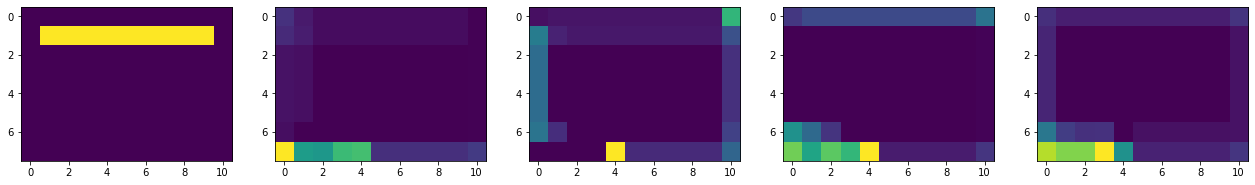

In [5]:
output = policy_net.features(init_screen)
print(output.size())

fig, axs = plt.subplots(1, 5, figsize=(22, 10))

for depth in range(5):
    img = output.detach().numpy()[0][depth]
    axs[depth].imshow(img)